2020.09.25 TF-IDF 상관관계분석 (문주혁)


In [ ]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import files

In [ ]:
# 문장을 숫자로 바꿔 줘야함
# 워드 임베딩
# 거리 벡터로 서로간 상관 관계 분석
# RNN Recursive Neural Network 은 구조를 학습하기 위한 데이터 구현에 시간이 많이 걸려
# RNN Recurrent 구조가 주로 사용된다. (입력값을 순서대로 받아서 처리하는)

In [ ]:
uploaded = files.upload()

Saving N_cont&like.csv to N_cont&like.csv


In [ ]:
# 단어 인덱싱
data = pd.read_csv('N_cont&like.csv', encoding='utf-8')
N_data = data['Content'][0].split(' ')
for i in range(1, len(data)):
    N_data = N_data + data['Content'][i].split(' ')
#N_data

In [ ]:
#단어 빈도
counts = Counter(N_data)
#counts

#단어빈도 기준 내림차순 정렬
vocab = sorted(counts, key=counts.get, reverse=True)
#vocab

In [ ]:
# 단어들에 번호를 매겨 그 번호와 그 단어를 dictionary로 저장
word2idx = {word.encode("utf8").decode("utf8"): ii for ii, word in enumerate(vocab,1)}
#word2idx

In [ ]:
# index가 key가 되도록 순서를 바꿈
idx2word = {ii: word for ii, word in enumerate(vocab)}
#idx2word

In [ ]:
# TF-IDF (TfidfVectorizer - CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만드는 함수)
# https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
tfidf = TfidfVectorizer(max_features = 40, max_df=0.95, min_df=0) # max_features 단어 40개 

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(vocab)

In [ ]:
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)

['57', '99', 'naver', 'oecd', '공공의료', '공공재', '국민이', '늘리면', '당일에', '대화', '모두', '문제인데', '민주주의', '보이냐', '산부인과', '아니라', '아닙니다', '없고', '응원합니다', '의대', '의대생', '의대정원', '의사협회', '의협', '이라고', '이렇게', '입니다', '전공의입니다', '정권', '정부', '정부는', '정부야', '정책입니다', '지지합니다', '파업', '하는', '한국', '한다', '합니다', '해주세요']


In [ ]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
#data.shape

In [ ]:
# TF-IDF score TOP 100 단어 시각화 
tsne = TSNE(n_components=3, n_iter=10000, verbose=1) # 단어 임베딩을 위한 차원 수 2개, 최적화를위한 최대 반복 횟수 10000(250이상 필)
data_array.shape
data_array.T.shape

(40, 3112)

In [ ]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.000s...
[t-SNE] Computed neighbors for 40 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 0.872926
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.014275
[t-SNE] KL divergence after 10000 iterations: 0.550381


In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


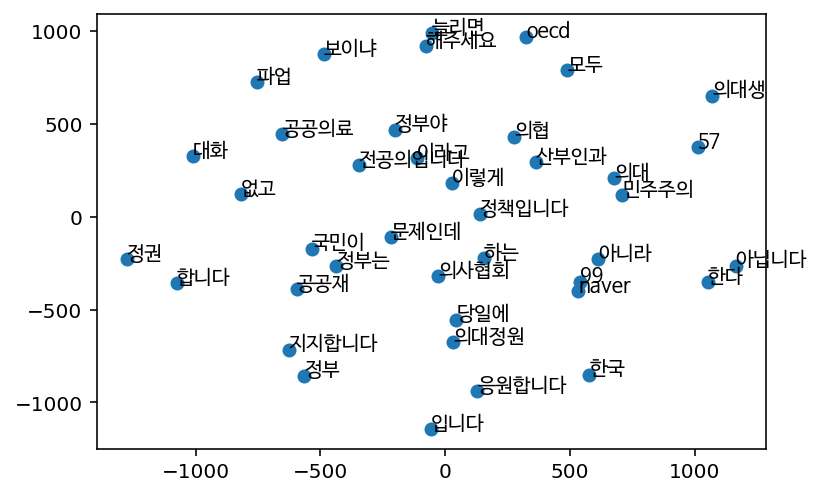

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=10)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf-8").decode("utf-8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()